In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

The database used here is already in keras.

In [3]:
fashion_data = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_data.load_data()

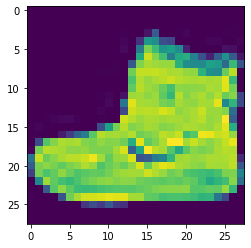

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train[0]

9

In [6]:
class_names = ['Tshirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'shirt', 'sneaker', 'bag', 'ankle boots']

In [7]:
class_names[y_train[0]]

'ankle boots'

## Data Normalization

In [8]:
x_train_normal = x_train/255
x_test_normal = x_test/255

Here we need to divide data in 3 sets:
* Training Set
* Validation Set
* Test set

In [9]:
x_valid, x_train_f = x_train_normal[:5000], x_train_normal[5000:]
y_valid, y_train_f = y_train[:5000], y_train[5000:]

In [10]:
x_test_f = x_test_normal

## Create the model architechture

There are two APIs for defining model in Keras:
* Sequential Model API
* Functional API

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

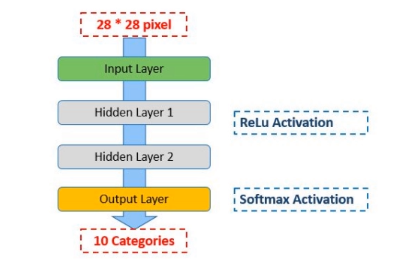

In [12]:
model_1 = keras.models.Sequential()
model_1.add(keras.layers.Flatten(input_shape = [28,28])) # input layer
# The number in argument of keras.....Dense() is the no. of neuron we want in that layer.
model_1.add(keras.layers.Dense(300, activation = 'relu')) # hidden layer1
model_1.add(keras.layers.Dense(100, activation = 'relu')) # hidden layer2
model_1.add(keras.layers.Dense(10, activation = 'softmax')) # Output Softmax layer

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


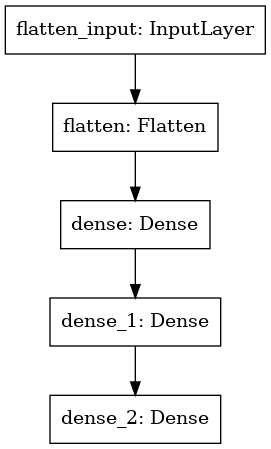

In [14]:
import pydot
keras.utils.plot_model(model_1)

In [15]:
weights, biases = model_1.layers[1].get_weights()

In [16]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

## Compling the model

In [19]:
model_1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
# loss is sparse cate....tropy as our y data is available in distinct labels.
# if we had probabilities we had to use categorical_crossentropy.
# if we had binary labels we have to use binary categorical crossentropy.
# for regression model use r2_score as accuracy. 

In [20]:
model_1_history = model_1.fit(x_train_f, y_train_f, epochs = 50, validation_data = (x_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4351 - val_accuracy: 0.8530
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8455 - val_loss: 0.5328 - val_accuracy: 0.7988
Epoch 4/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4125 - accuracy: 0.8565 - val_loss: 0.3917 - val_accuracy: 0.8650
Epoch 5/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.3749 - val_accuracy: 0.8692
Epoch 6/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3706 - val_accuracy: 0.8728
Epoch 7/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3633 - accuracy: 0.8712 - val_loss: 0.3617 - val_accuracy:

In [21]:
model_1_history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [22]:
model_1_history.history

{'loss': [0.7236780524253845,
  0.4842395484447479,
  0.4391767680644989,
  0.41245394945144653,
  0.39393123984336853,
  0.3752237558364868,
  0.3633035123348236,
  0.3519047796726227,
  0.34159180521965027,
  0.3322497010231018,
  0.3242575228214264,
  0.31497058272361755,
  0.30825915932655334,
  0.3022339344024658,
  0.29480135440826416,
  0.2891237139701843,
  0.2839418947696686,
  0.27790001034736633,
  0.27290600538253784,
  0.26760655641555786,
  0.26241564750671387,
  0.25787296891212463,
  0.2535327076911926,
  0.2485954314470291,
  0.24446184933185577,
  0.24059486389160156,
  0.23660306632518768,
  0.23294679820537567,
  0.22867168486118317,
  0.2252989113330841,
  0.22140513360500336,
  0.21776840090751648,
  0.21420340240001678,
  0.21087731420993805,
  0.2065398097038269,
  0.20445235073566437,
  0.20091792941093445,
  0.19644272327423096,
  0.19543223083019257,
  0.1916406750679016,
  0.18851569294929504,
  0.18584655225276947,
  0.18193122744560242,
  0.179379805922508

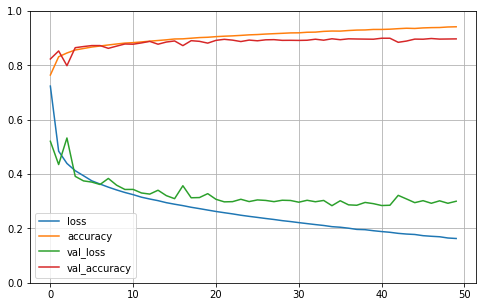

In [23]:
# Plotting accuracy, loss, val_accuracy, val_loss
import pandas as pd
pd.DataFrame(model_1_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Performance Evaluation

In [24]:
model_1.evaluate(x_test_f, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8882


[0.3339446187019348, 0.8881999850273132]